## **MOBILE PRICE PREDICTION**

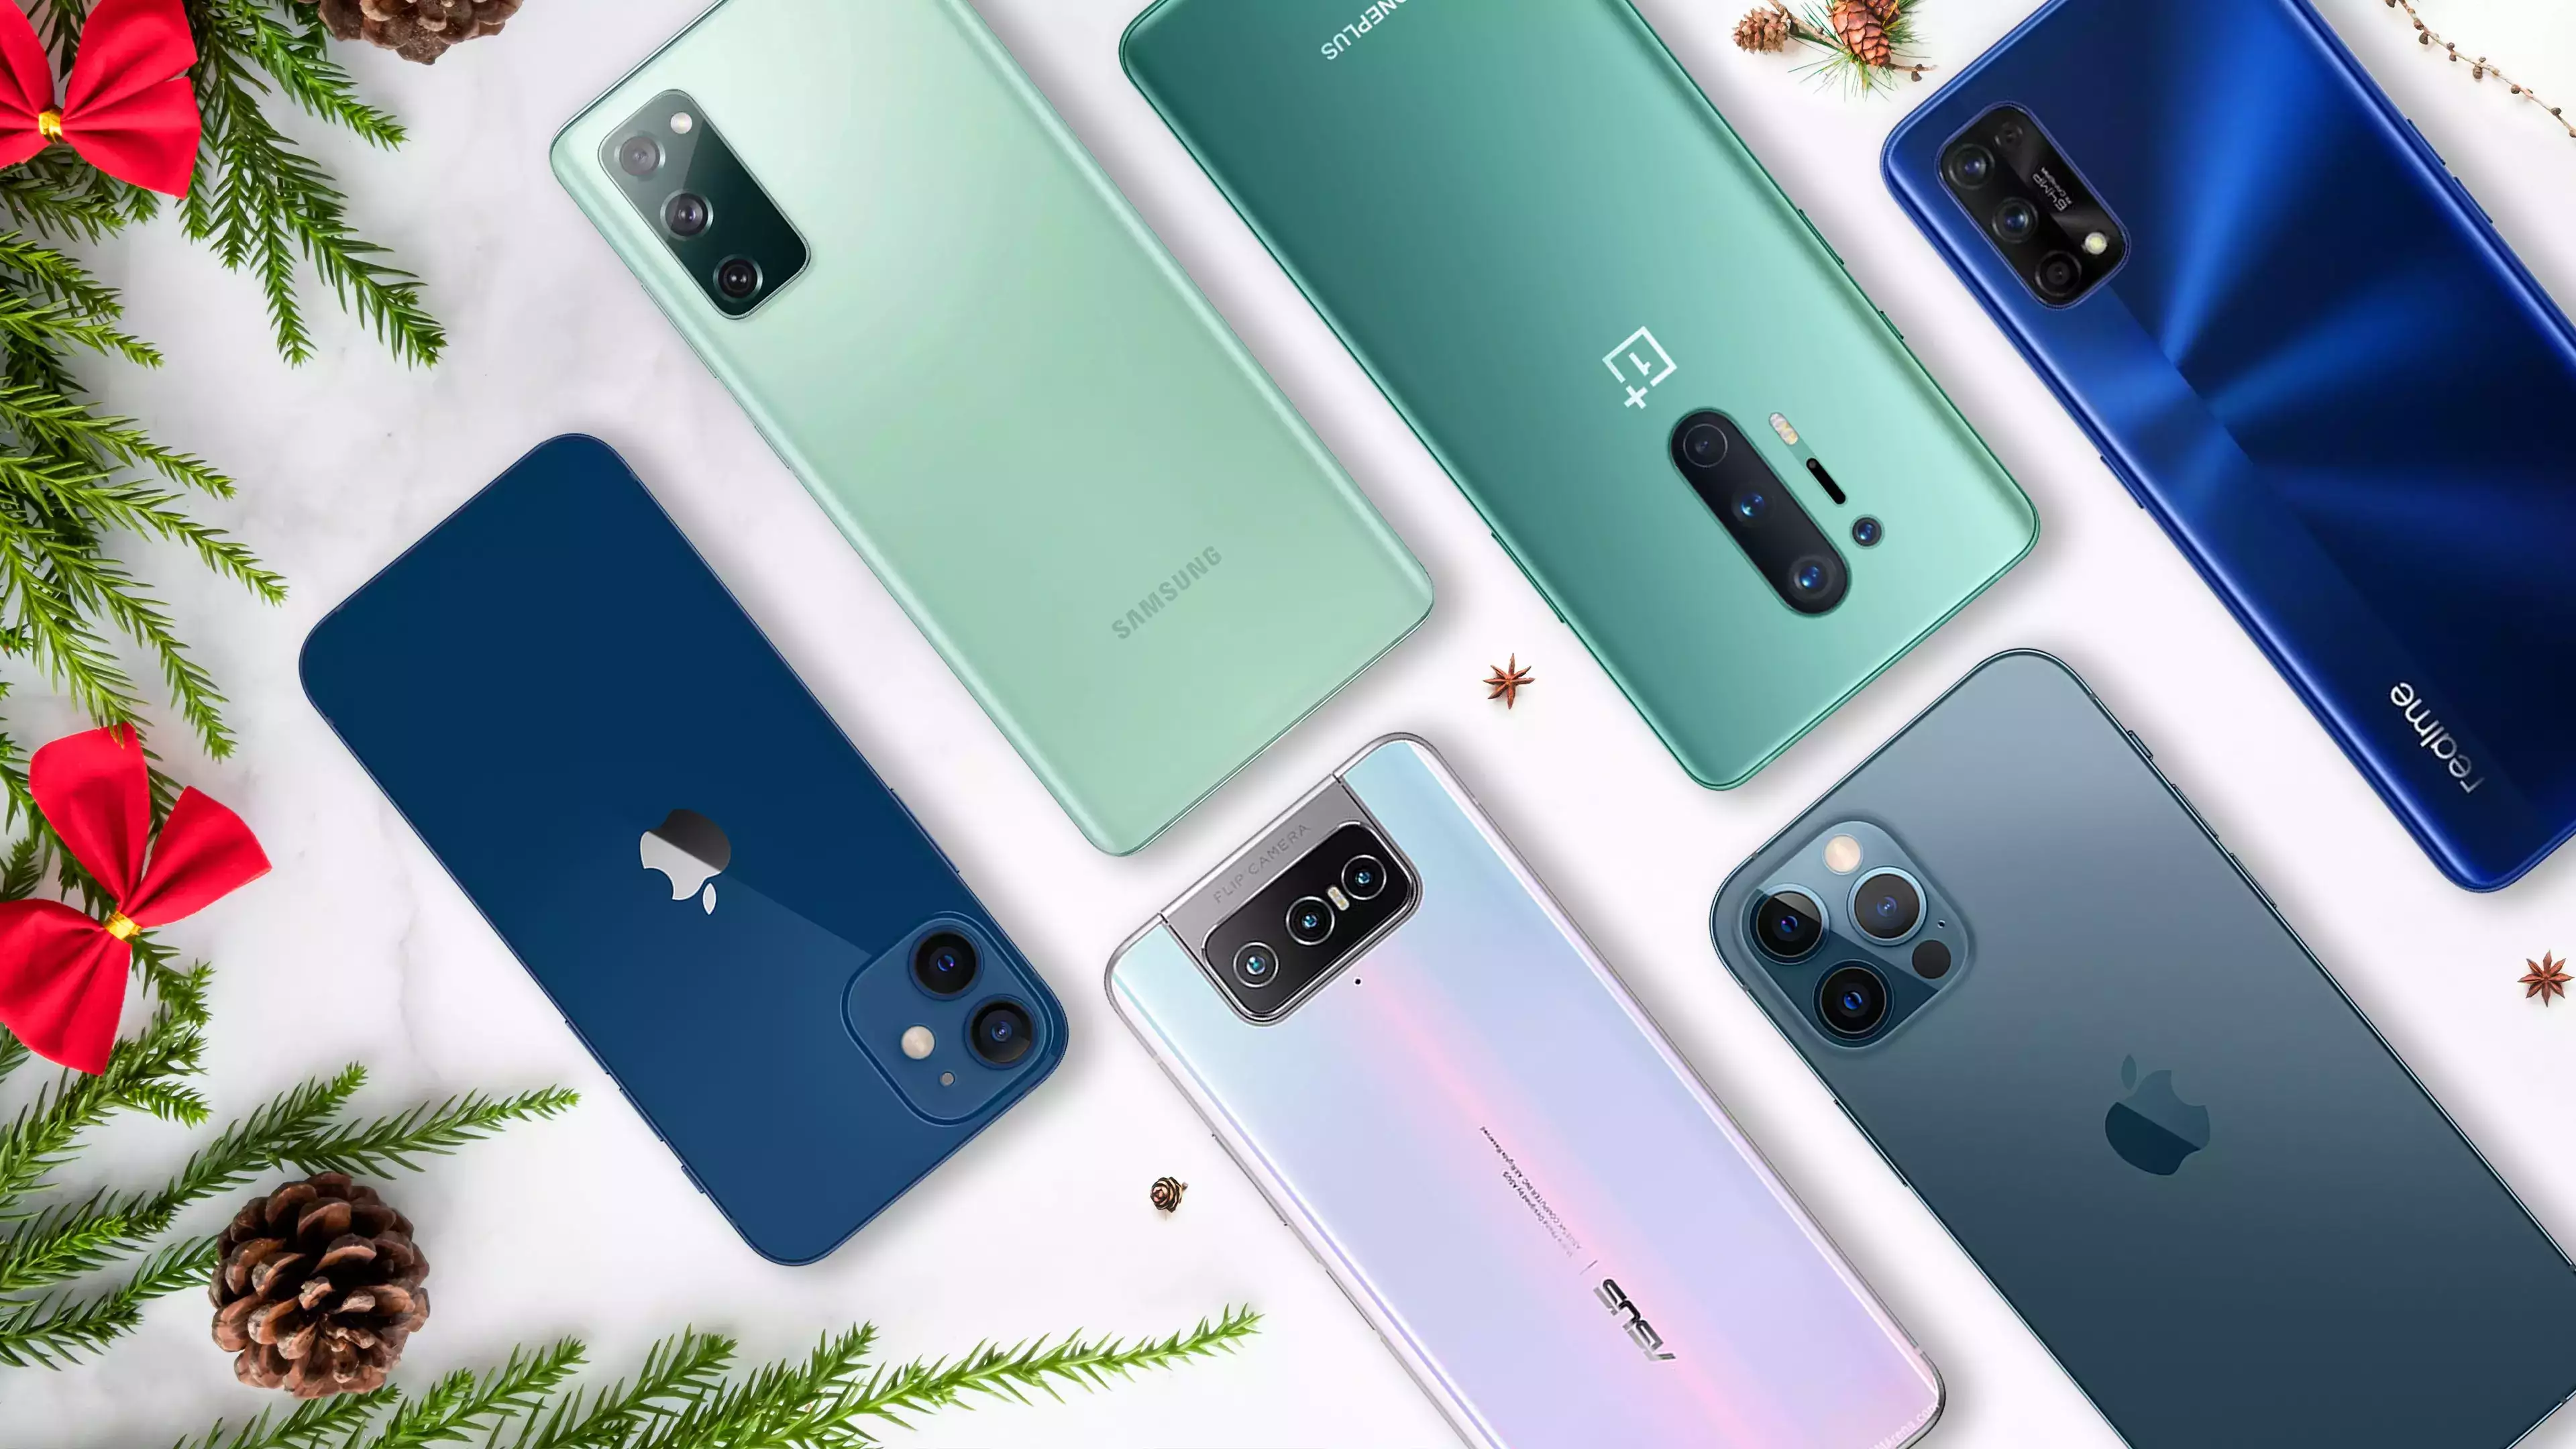

**Project Type  - Classification**

**Team Member - Individual**

**AIM**:
In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile

In this data:

id:ID
battery_power:Total energy a battery can store in one time measured in mAh

blue:Has bluetooth or not

clock_speed:speed at which microprocessor executes instructions

dual_sim:Has dual sim support or not

fc:Front Camera mega pixels

four_g:Has 4G or not

int_memory:Internal Memory in Gigabytes

m_dep:Mobile Depth in cm

mobile_wt:Weight of mobile phone

n_cores:Number of cores of processor

pc:Primary Camera mega pixels

px_height:Pixel Resolution Height

px_width:Pixel Resolution Width

ram:Random Access Memory in Megabytes

sc_h:Screen Height of mobile in cm

sc_w:Screen Width of mobile in cm

talk_time:longest time that a single battery charge will last when you are

three_g:Has 3G or not

touch_screen:Has touch screen or not
wifi:Has wifi or not
USE:
This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
Also it will be usefull for Consumers to verify that they are paying best price for a mobile.





In [ ]:
# importing  all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mob_data.csv to mob_data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['mob_data.csv']))
# Dataset is now stored in a Pandas Dataframe
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Minimum value of px_height and sc_w cannot be zero so we need to handle that**

In [ ]:
# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))

180
2


In [ ]:
#where ther is sc_W and px_height is zero ,assigning mean values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [ ]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

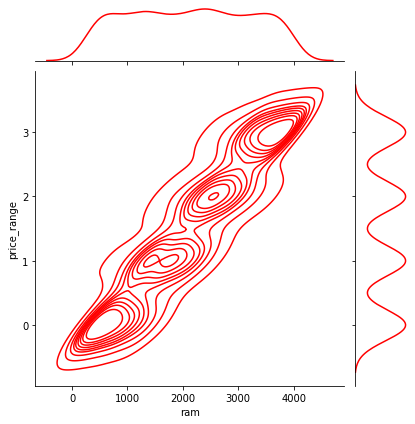

In [ ]:
sns.jointplot(x='ram',y='price_range',data=df,color='red',kind='kde')


This plot shows how the RAM is spread. there is a gradual increase  in the price range as RAM increases.

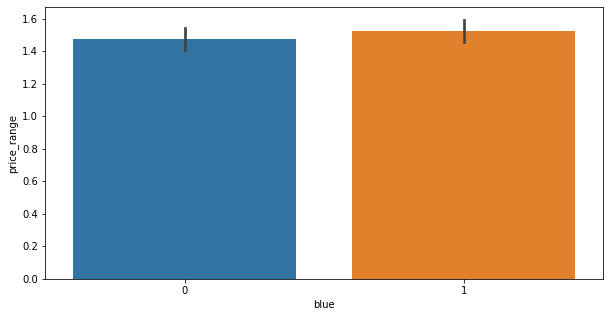

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)

Half the devices have Bluetooth, and half don’t.

In [ ]:
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values

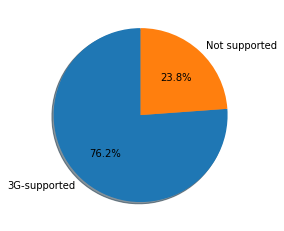

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

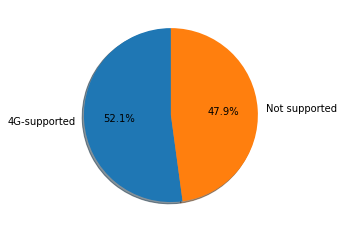

In [ ]:
labels4g = ["4G-supported",'Not supported']
values4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

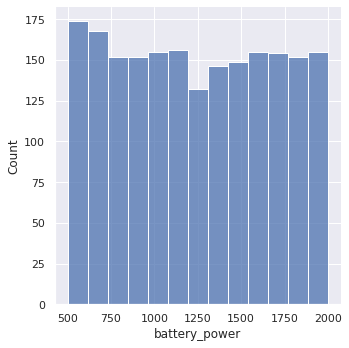

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(df["battery_power"])
plt.show()

This plot shows how the battery mAh is spread. there is a gradual increase as the price range increases

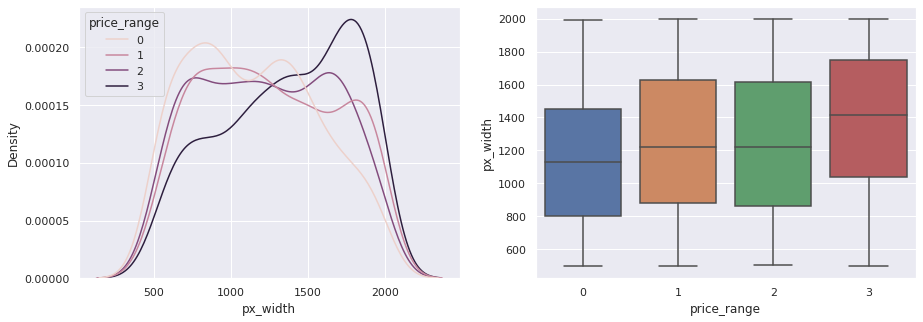

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

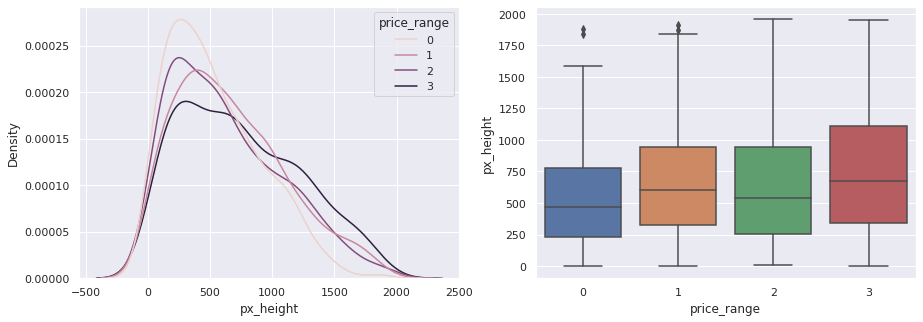

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height.

Text(0.5, 0, 'MegaPixels')

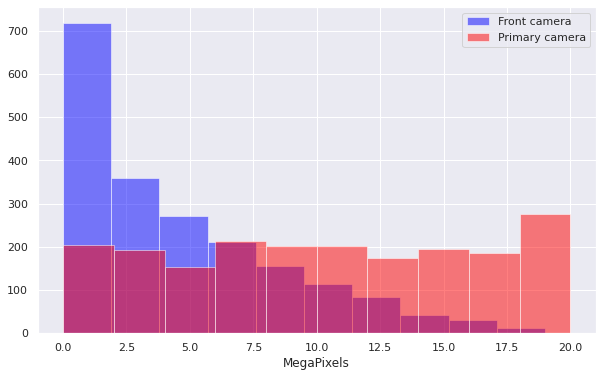

In [ ]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

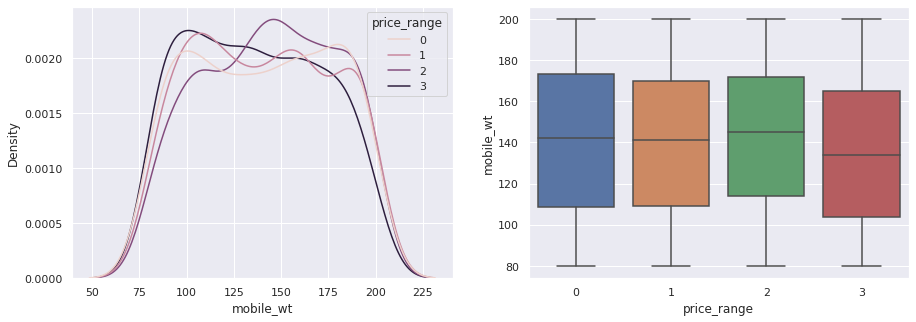

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

Costly phones are lighter.

**screen_size**

Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.



In [ ]:
# Defining new variable sc_size

df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))
df['sc_size'] = round(df['sc_size']/2.54, 2)

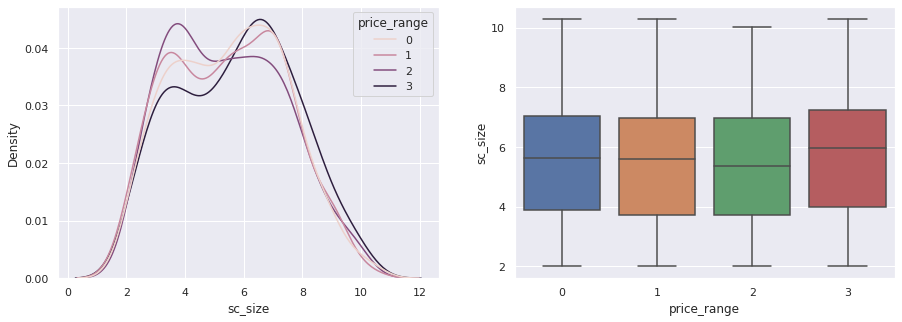

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])
plt.show()

Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.



### **Talk time vs Price**

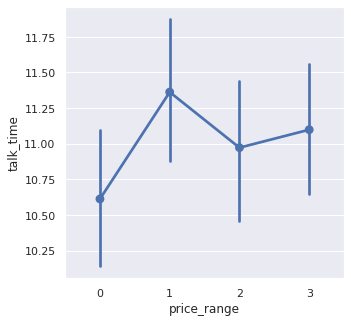

In [ ]:
sns.pointplot(y="talk_time", x="price_range", data=df)

In [ ]:
# Let's drop sc_h and s_w

df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [ ]:

binary_features = [ 'four_g', 'three_g']


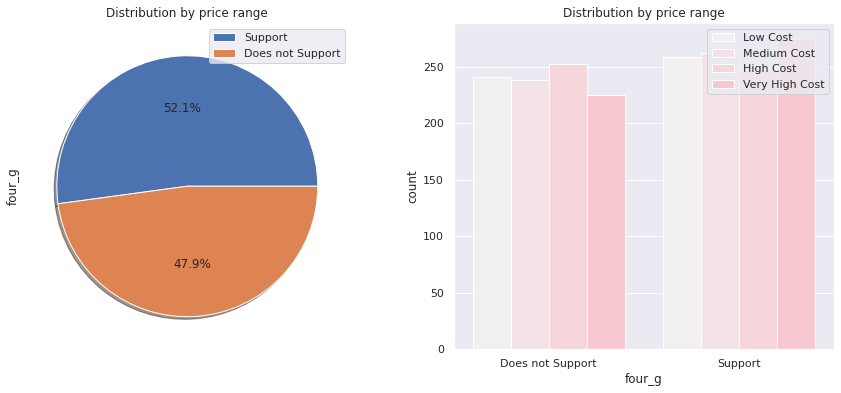

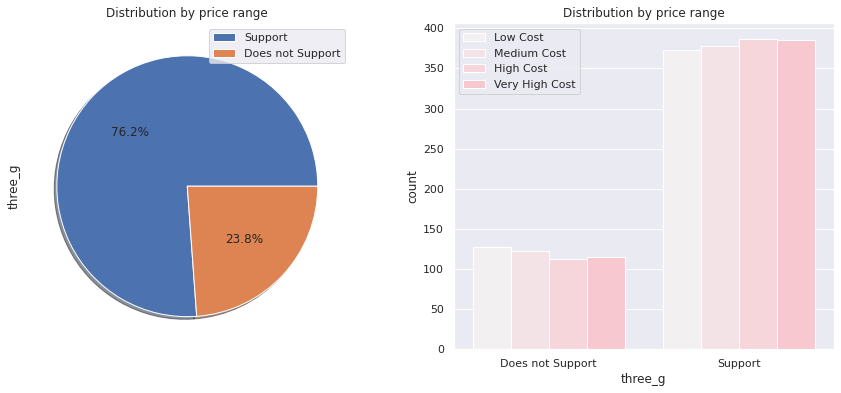

In [ ]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

feature 'three_g' play an important feature in prediction

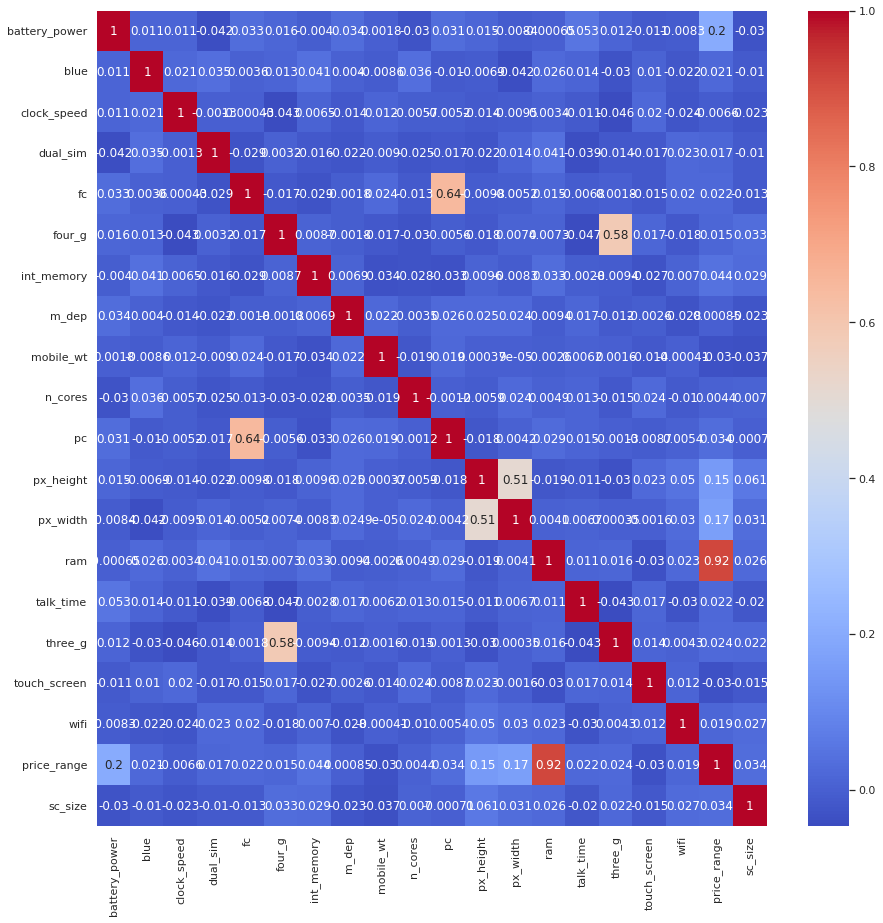

In [ ]:
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [15, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

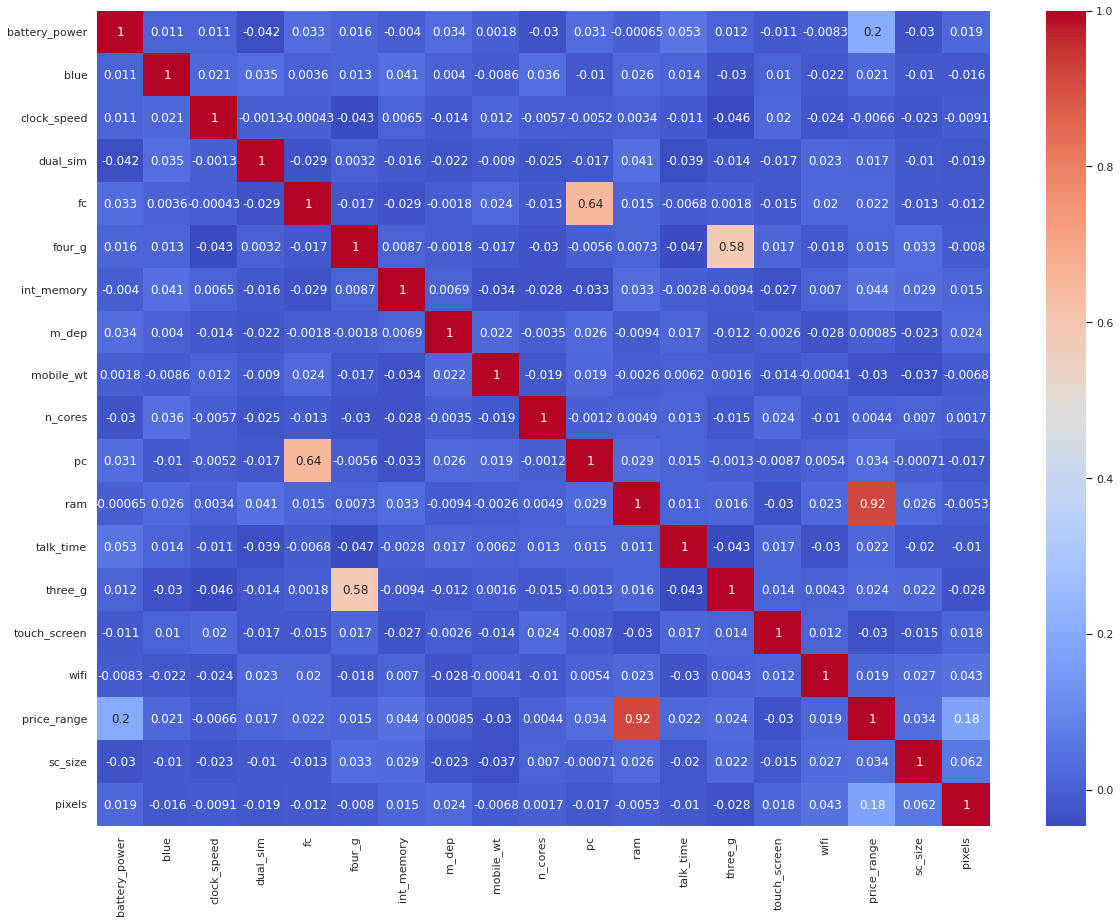

In [ ]:
#  defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot =
            True)

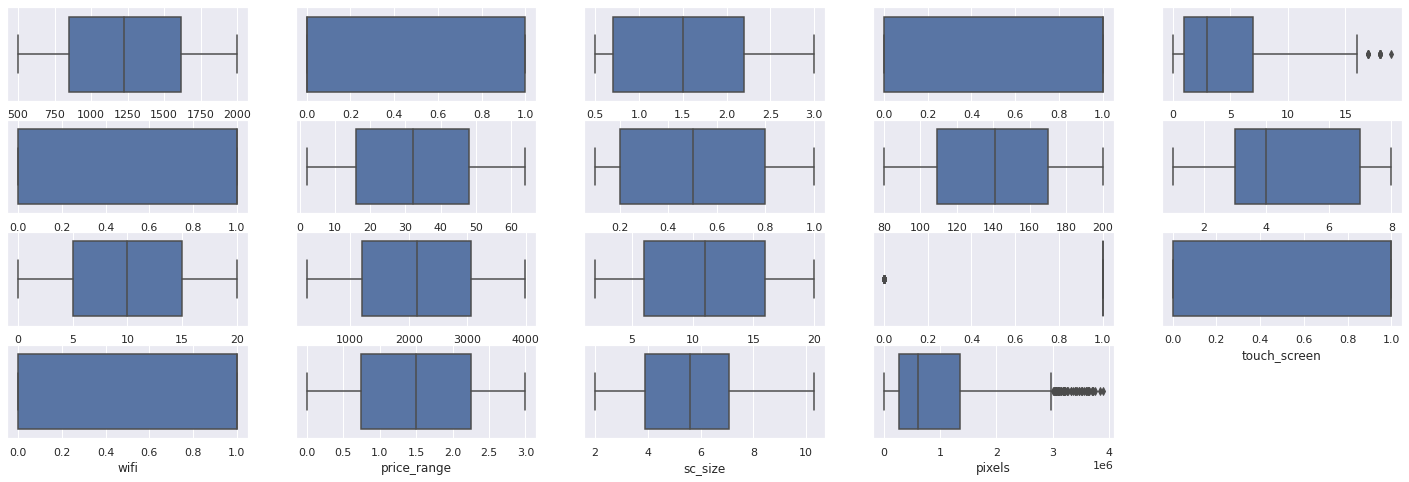

In [ ]:
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

There are not many outliers.

In [ ]:
# Defining X and y

X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [ ]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape

(1600, 18)

In [ ]:
y_train.shape

(1600,)

## **Creating & Training Logistic Regression Model**

In [ ]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.86      0.87      0.86        90
           2       0.82      0.82      0.82        92
           3       0.92      0.93      0.92       111

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



[[102   3   0   0]
 [  5  78   8   0]
 [  0   9  75   8]
 [  0   0   9 103]]


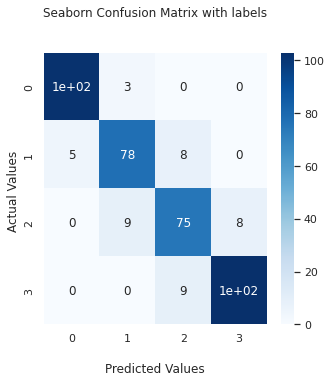

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])


## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       403
           1       0.89      0.89      0.89       410
           2       0.86      0.90      0.88       388
           3       0.96      0.93      0.95       399

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



## **Creating & Training Random Forest Model**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.885

In [ ]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.87      0.86      0.86        91
           2       0.79      0.86      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



[[100   5   0   0]
 [  7  78   6   0]
 [  0   7  79   6]
 [  0   0  15  97]]


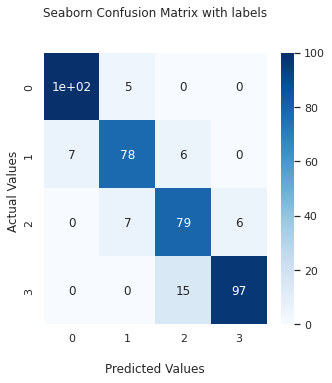

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.500289
1,battery_power,0.079357
2,pixels,0.074371
3,mobile_wt,0.043348
4,sc_size,0.041853


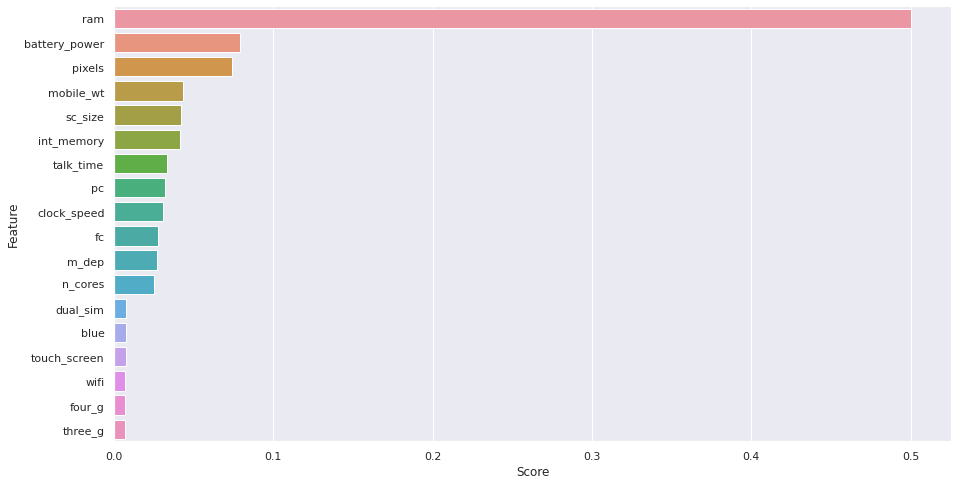

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

### **XG BOOST**

In [ ]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.83      0.88      0.86        91
           2       0.81      0.84      0.82        92
           3       0.94      0.89      0.92       112

    accuracy                           0.89       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400



In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)

Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# Cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.853 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.863 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.856 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.856 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(max_depth=5, objective='multi:softprob'),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [ ]:
# Prediction

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)

Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       105
           1       0.85      0.86      0.85        91
           2       0.83      0.87      0.85        92
           3       0.95      0.91      0.93       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



[[ 98   7   0   0]
 [  7  78   6   0]
 [  0   7  80   5]
 [  0   0  10 102]]


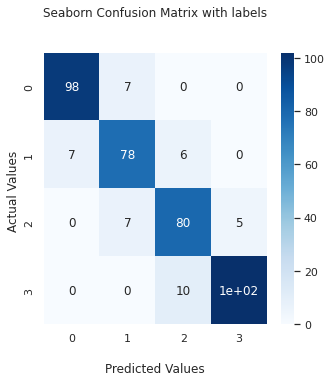

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.99      0.98      0.98       409
           2       0.98      0.99      0.98       408
           3       0.99      0.99      0.99       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



# **Conclusion**
From EDA we can see that there are mobile phones in 4 price ranges.

The number of elements is almost similar.
half the devices have Bluetooth, and half don’t

There is a gradual increase in battery as the price range increases
Ram has continuous increase with price range while moving from Low cost to Very high cost

Costly phones are lighter

RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

From all the above experiments we can conclude that logistic regression and, XGboosting with using hyperparameters we got the best results.